1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

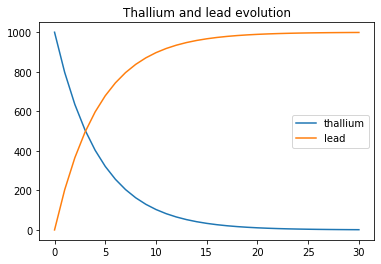

In [2]:
def p(t,T):
    return 1 - pow(2,-t/T)

T = 3.052
thallium = 1000
lead = 0
t = 0

thallium_set = [thallium]
lead_set = [lead]
time = [t]


while(True):
    z = thallium * p(1,T)
    thallium -= z
    lead += z
    t +=1
    if(thallium < 1):
        break
    thallium_set.append(thallium)
    lead_set.append(lead)
    time.append(t)
    
    
plt.title('Thallium and lead evolution')
plt.plot(time,thallium_set,label="thallium")
plt.plot(time,lead_set, label="lead")
plt.legend()
plt.show()

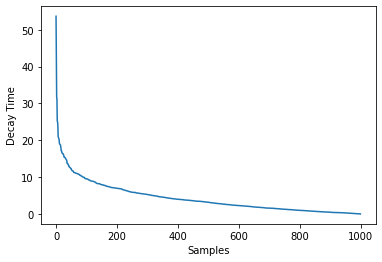

In [3]:
def p2(t,T):
    return -T*np.log(1-t)/np.log(2)

decay_t = p2(np.random.random(1000),T)
plt.plot(np.sort(decay_t)[::-1])
plt.xlabel('Samples')
plt.ylabel('Decay Time')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

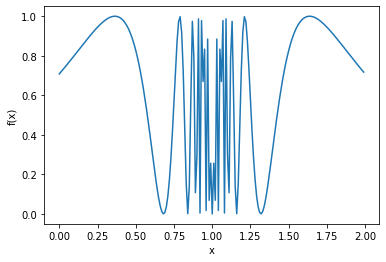

In [4]:
def f(x):
    if(x == 1):
        return 0
    return pow(math.sin(1/(1-x)),2)
interval = np.arange(0, 2, 0.01)
plt.plot(interval, list(map(f, interval)))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [5]:
N = 100000
count = 0
for i in range(N):
    x = 2 * np.random.random()
    y = np.random.random()
    if y < f(x): count += 1
I = 2 * count / N
print("Integral:", I)

Integral: 1.34748


In [6]:
x = np.linspace(0, 2, N)

total_sum = 0
for e in x:
    total_sum += f(e)

I_2 = (2/N)* total_sum

print("mean value :",I_2)

mean value : 1.3467776727929357


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [7]:
def isInCircle(x, y):
    return x**2 + y**2 <= 1

N = 1000000
count = 0

for i in range(N):
    x = np.random.random()
    y = np.random.random()

    if (isInCircle(x, y)):
        count += 1
        
result = 4*count / N

print("Pi founded: ", result)
print("Error: ",math.pi - result)

Pi founded:  3.141096
Error:  0.0004966535897930058


In [8]:
def isInSphere(params):
    res = 0
    for p in params:
        res += p**2
    if res <= 1:
        return 1
    return 0

N = 1000000
D = 10
count = 0

for i in range(N):
    params = []
    for i in range(D):
        params.append(np.random.random())

    if (isInSphere(params)):
        count += 1
        
I=2**D*count/N

print("10-D Sphere integral: ", I)

10-D Sphere integral:  2.540544


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [9]:
def f(x):
    return pow(x,-1/2)/(np.exp(x) + 1)

def w(x):
    return pow(x,-1/2)

N = 1000

x = np.linspace(0.001,1,N)
I = (1/N) * np.sum(f(x)/w(x))*2

print("The integral results: ", I)

The integral results:  0.7595399364028262
